In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries:

In [5]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Overview:

In [6]:
file_path = '/content/drive/MyDrive/Loan Default Prediction/German_bank.csv'
data = pd.read_csv(file_path)
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [8]:
data.shape

(1000, 17)

In [9]:
data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [10]:
data.dtypes

,0
checking_balance,object
months_loan_duration,int64
credit_history,object
purpose,object
amount,int64
savings_balance,object
employment_duration,object
percent_of_income,int64
years_at_residence,int64
age,int64


In [11]:
data_col = list(data.columns)
print(data_col)

['checking_balance', 'months_loan_duration', 'credit_history', 'purpose', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents', 'phone', 'default']


In [12]:
data.describe(include=['O']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


# Data Cleaning:

In [13]:
data.isnull()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isna().sum()

,0
checking_balance,0
months_loan_duration,0
credit_history,0
purpose,0
amount,0
savings_balance,0
employment_duration,0
percent_of_income,0
years_at_residence,0
age,0


In [15]:
data.dropna(inplace=True)

In [16]:
data.isna().sum()

,0
checking_balance,0
months_loan_duration,0
credit_history,0
purpose,0
amount,0
savings_balance,0
employment_duration,0
percent_of_income,0
years_at_residence,0
age,0


In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data.duplicated().sum()

np.int64(0)

In [19]:
numeric_columns = data.select_dtypes(include=['number']).columns
print('Numeric Columns:',numeric_columns)

categorical_columns = data.select_dtypes(include=['object']).columns
print('Categorical Columns:', categorical_columns)


Numeric Columns: Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents'],
      dtype='object')
Categorical Columns: Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job', 'phone',
       'default'],
      dtype='object')


In [20]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


# Outliers:

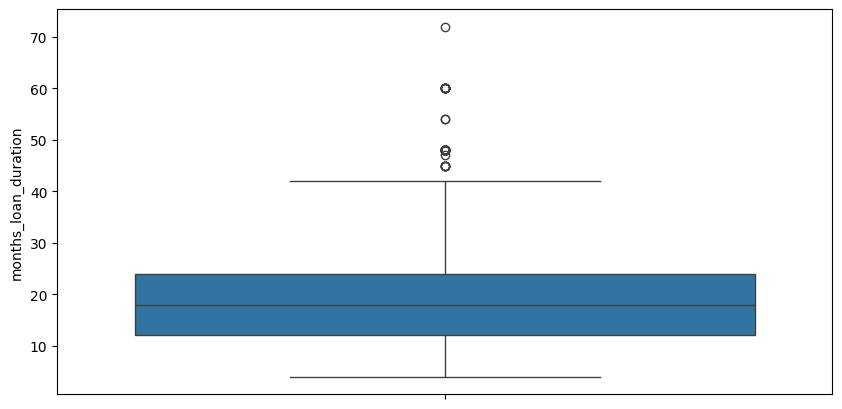

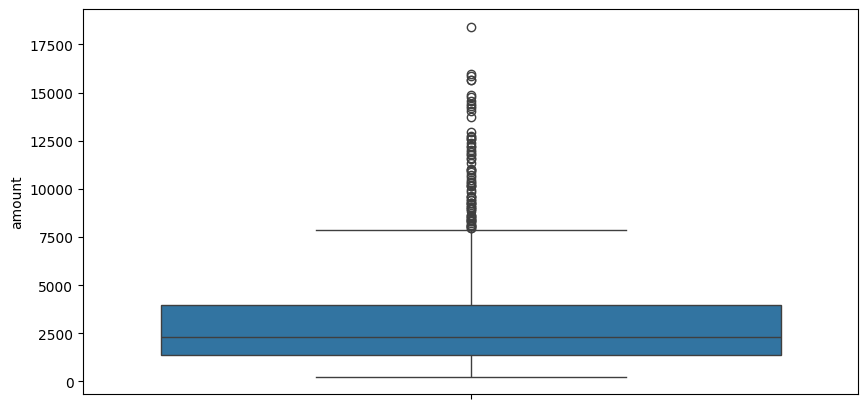

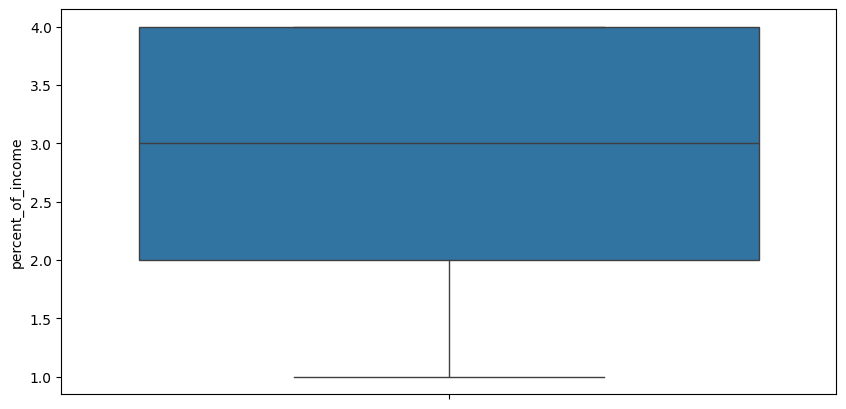

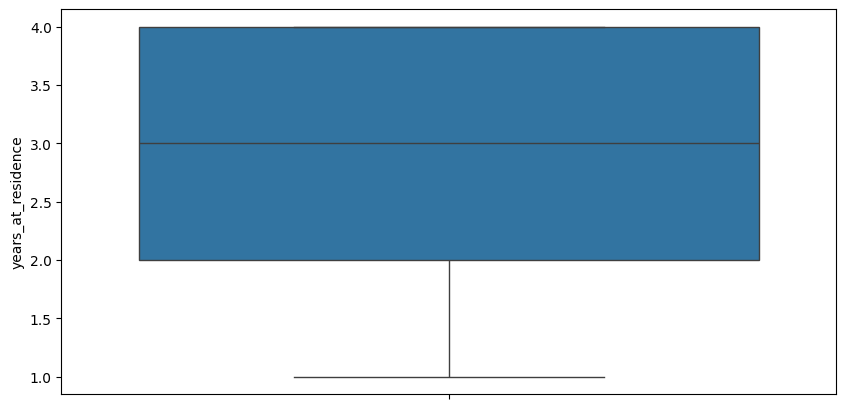

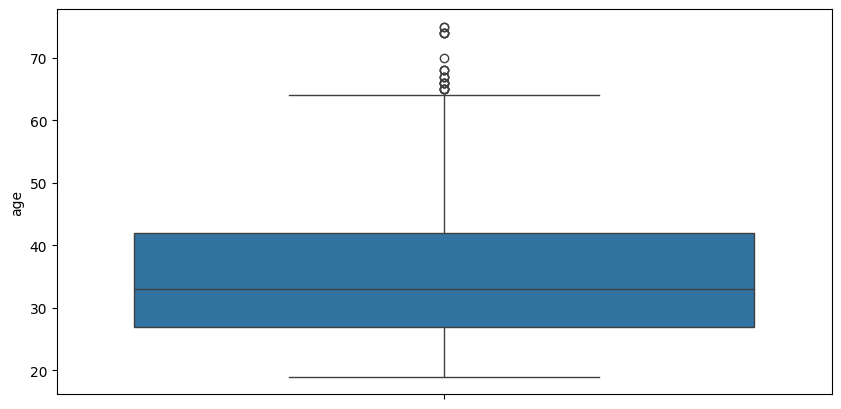

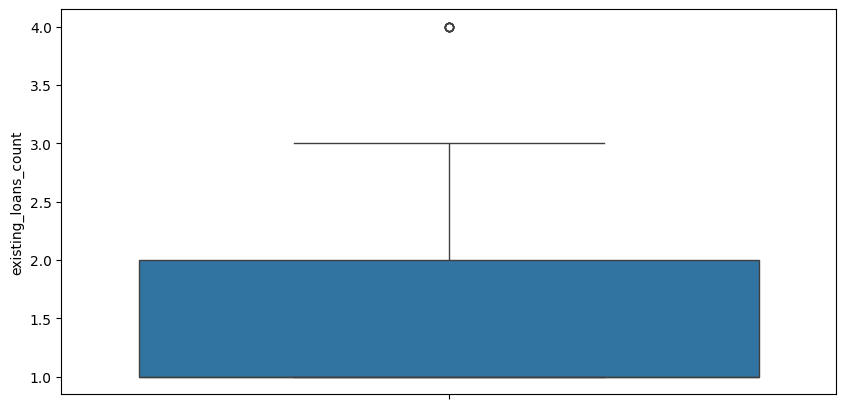

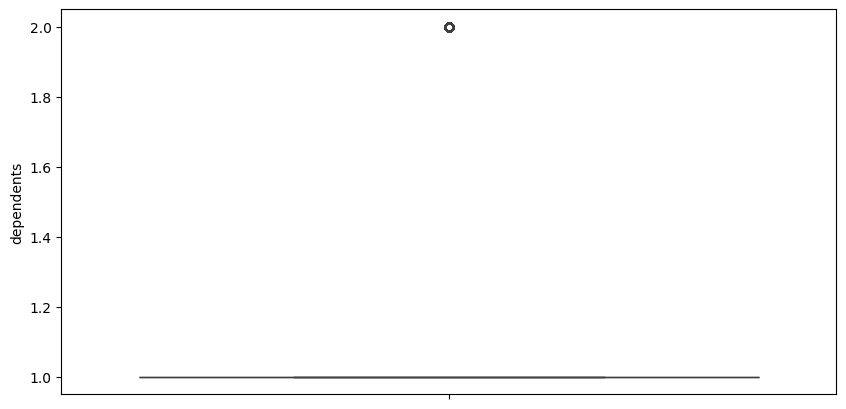

In [21]:
for i in numeric_columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[i])
  plt.show()

# Data Visualisation:

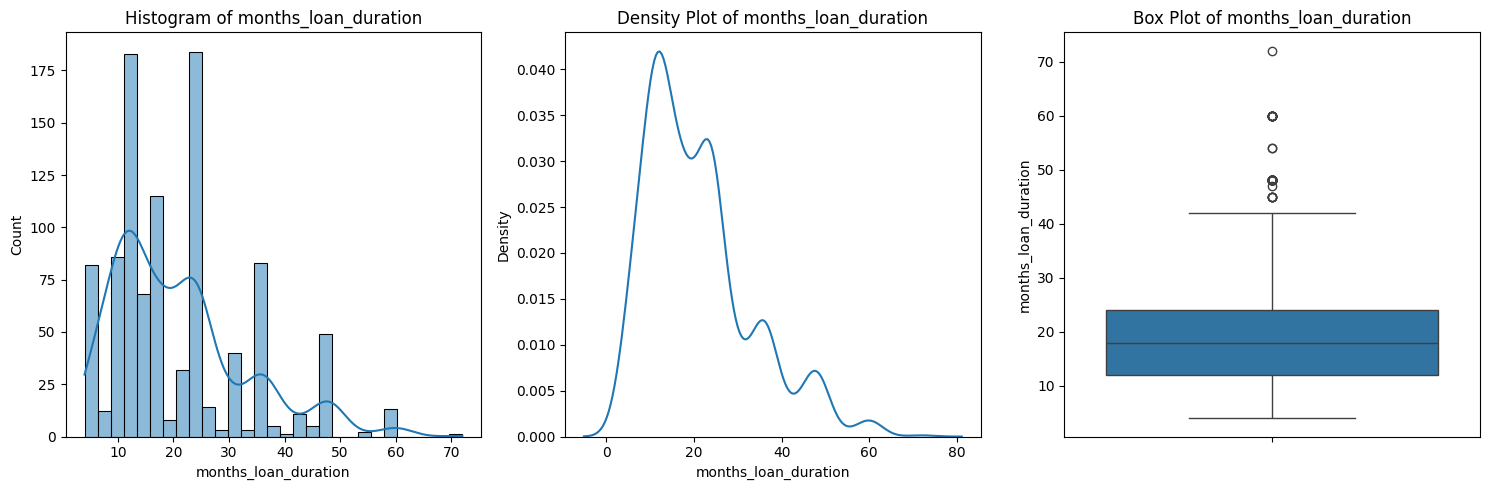

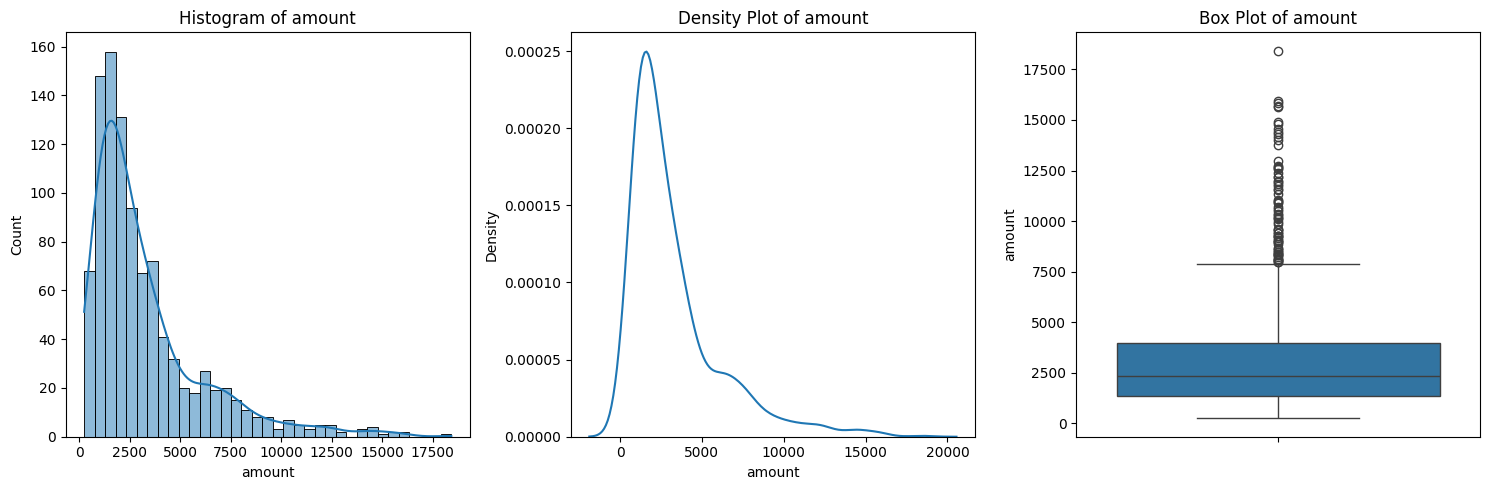

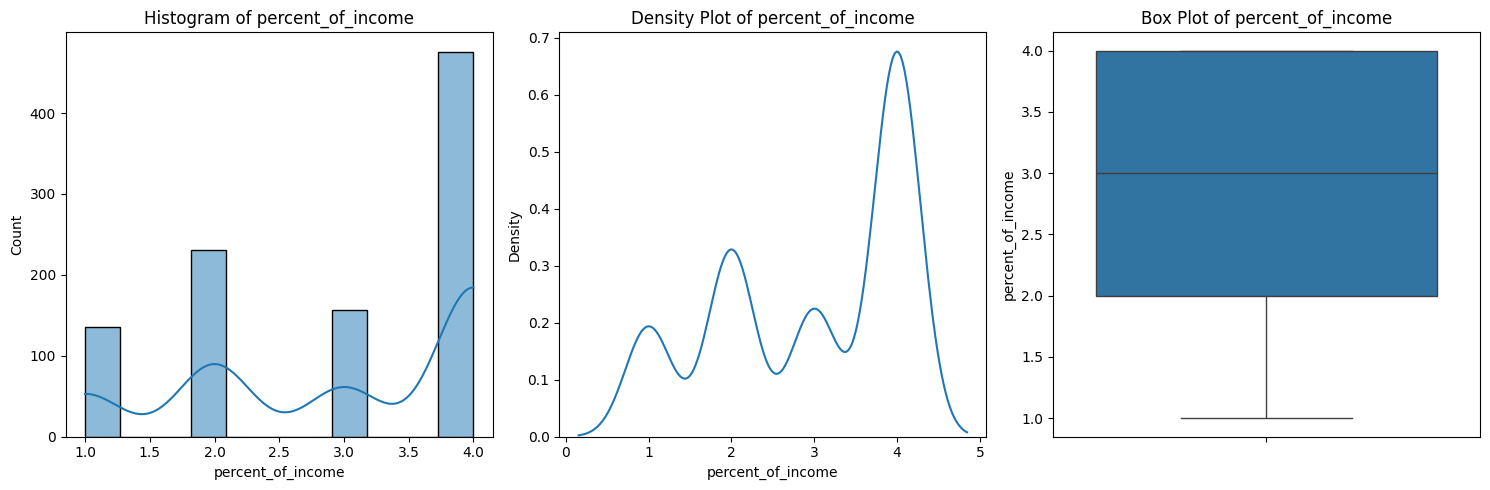

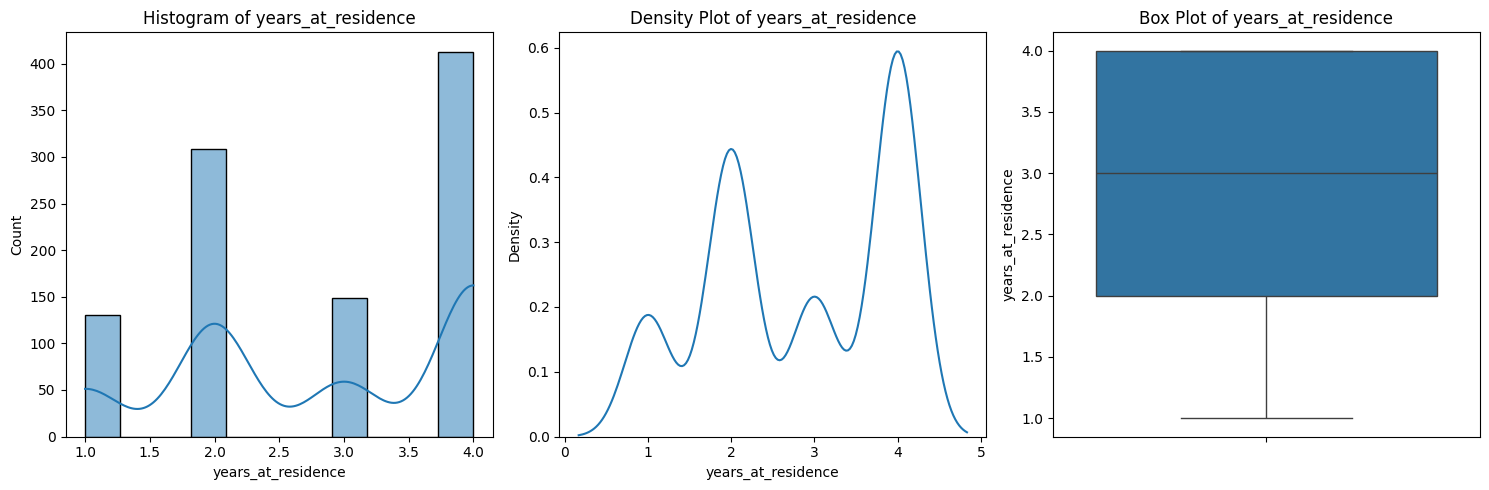

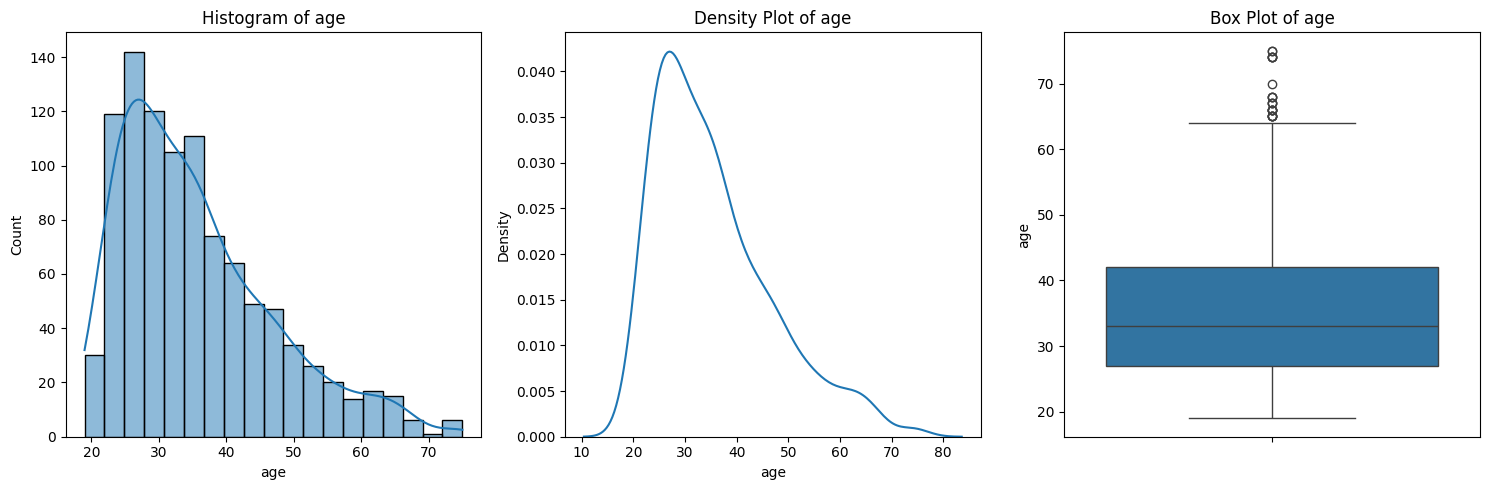

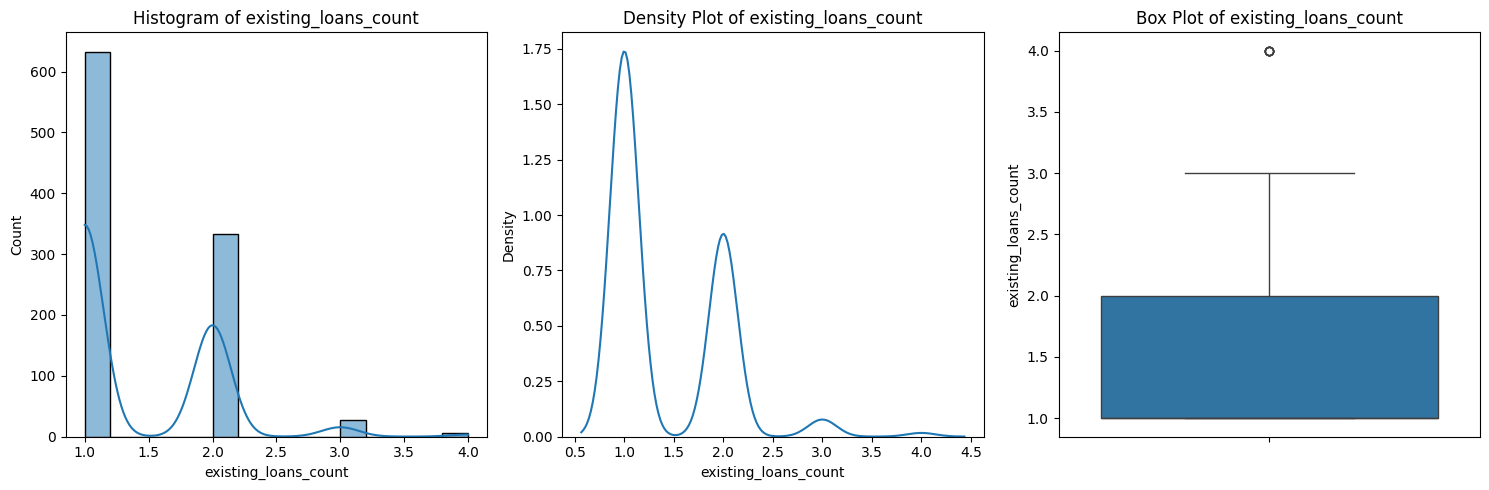

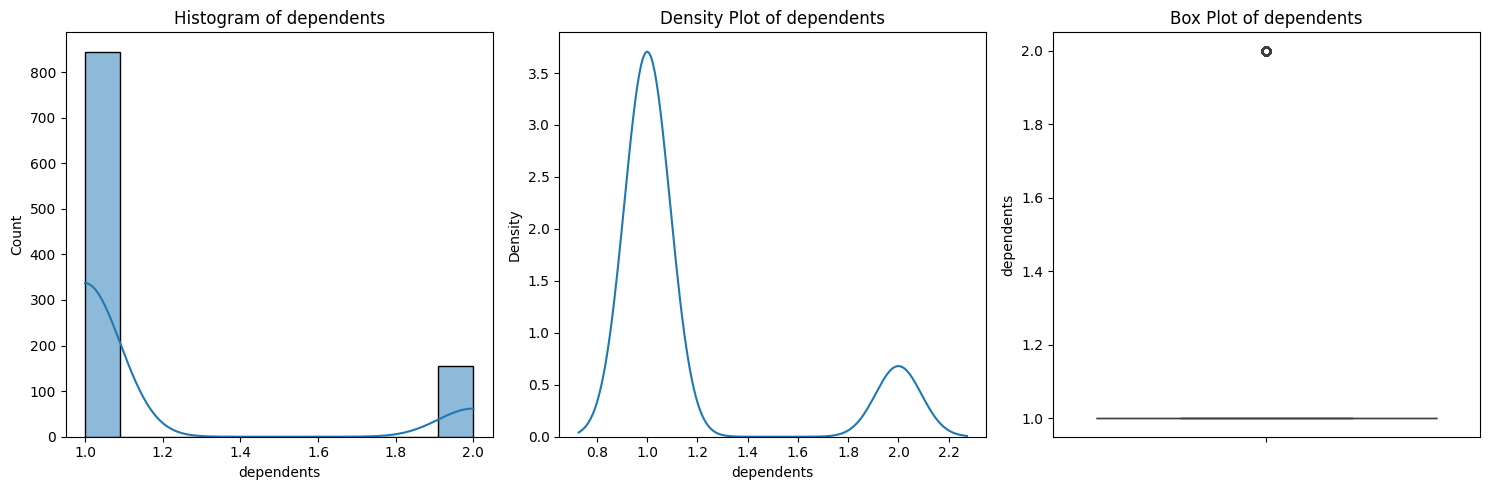

In [22]:
# Histogram, Density Plot and box plot for each numerical column
for column in numeric_columns:
  # Create a figure with subplots
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  # Histogram
  sns.histplot(data[column], kde=True, ax=axes[0])
  axes[0].set_title(f'Histogram of {column}')

  #Density Plot
  sns.kdeplot(data[column], ax=axes[1])
  axes[1].set_title(f'Density Plot of {column}')

  #Box Plot
  sns.boxplot(data[column], ax=axes[2])
  axes[2].set_title(f'Box Plot of {column}')

  # Adjust the spacing between subplots
  plt.tight_layout()

  plt.show()

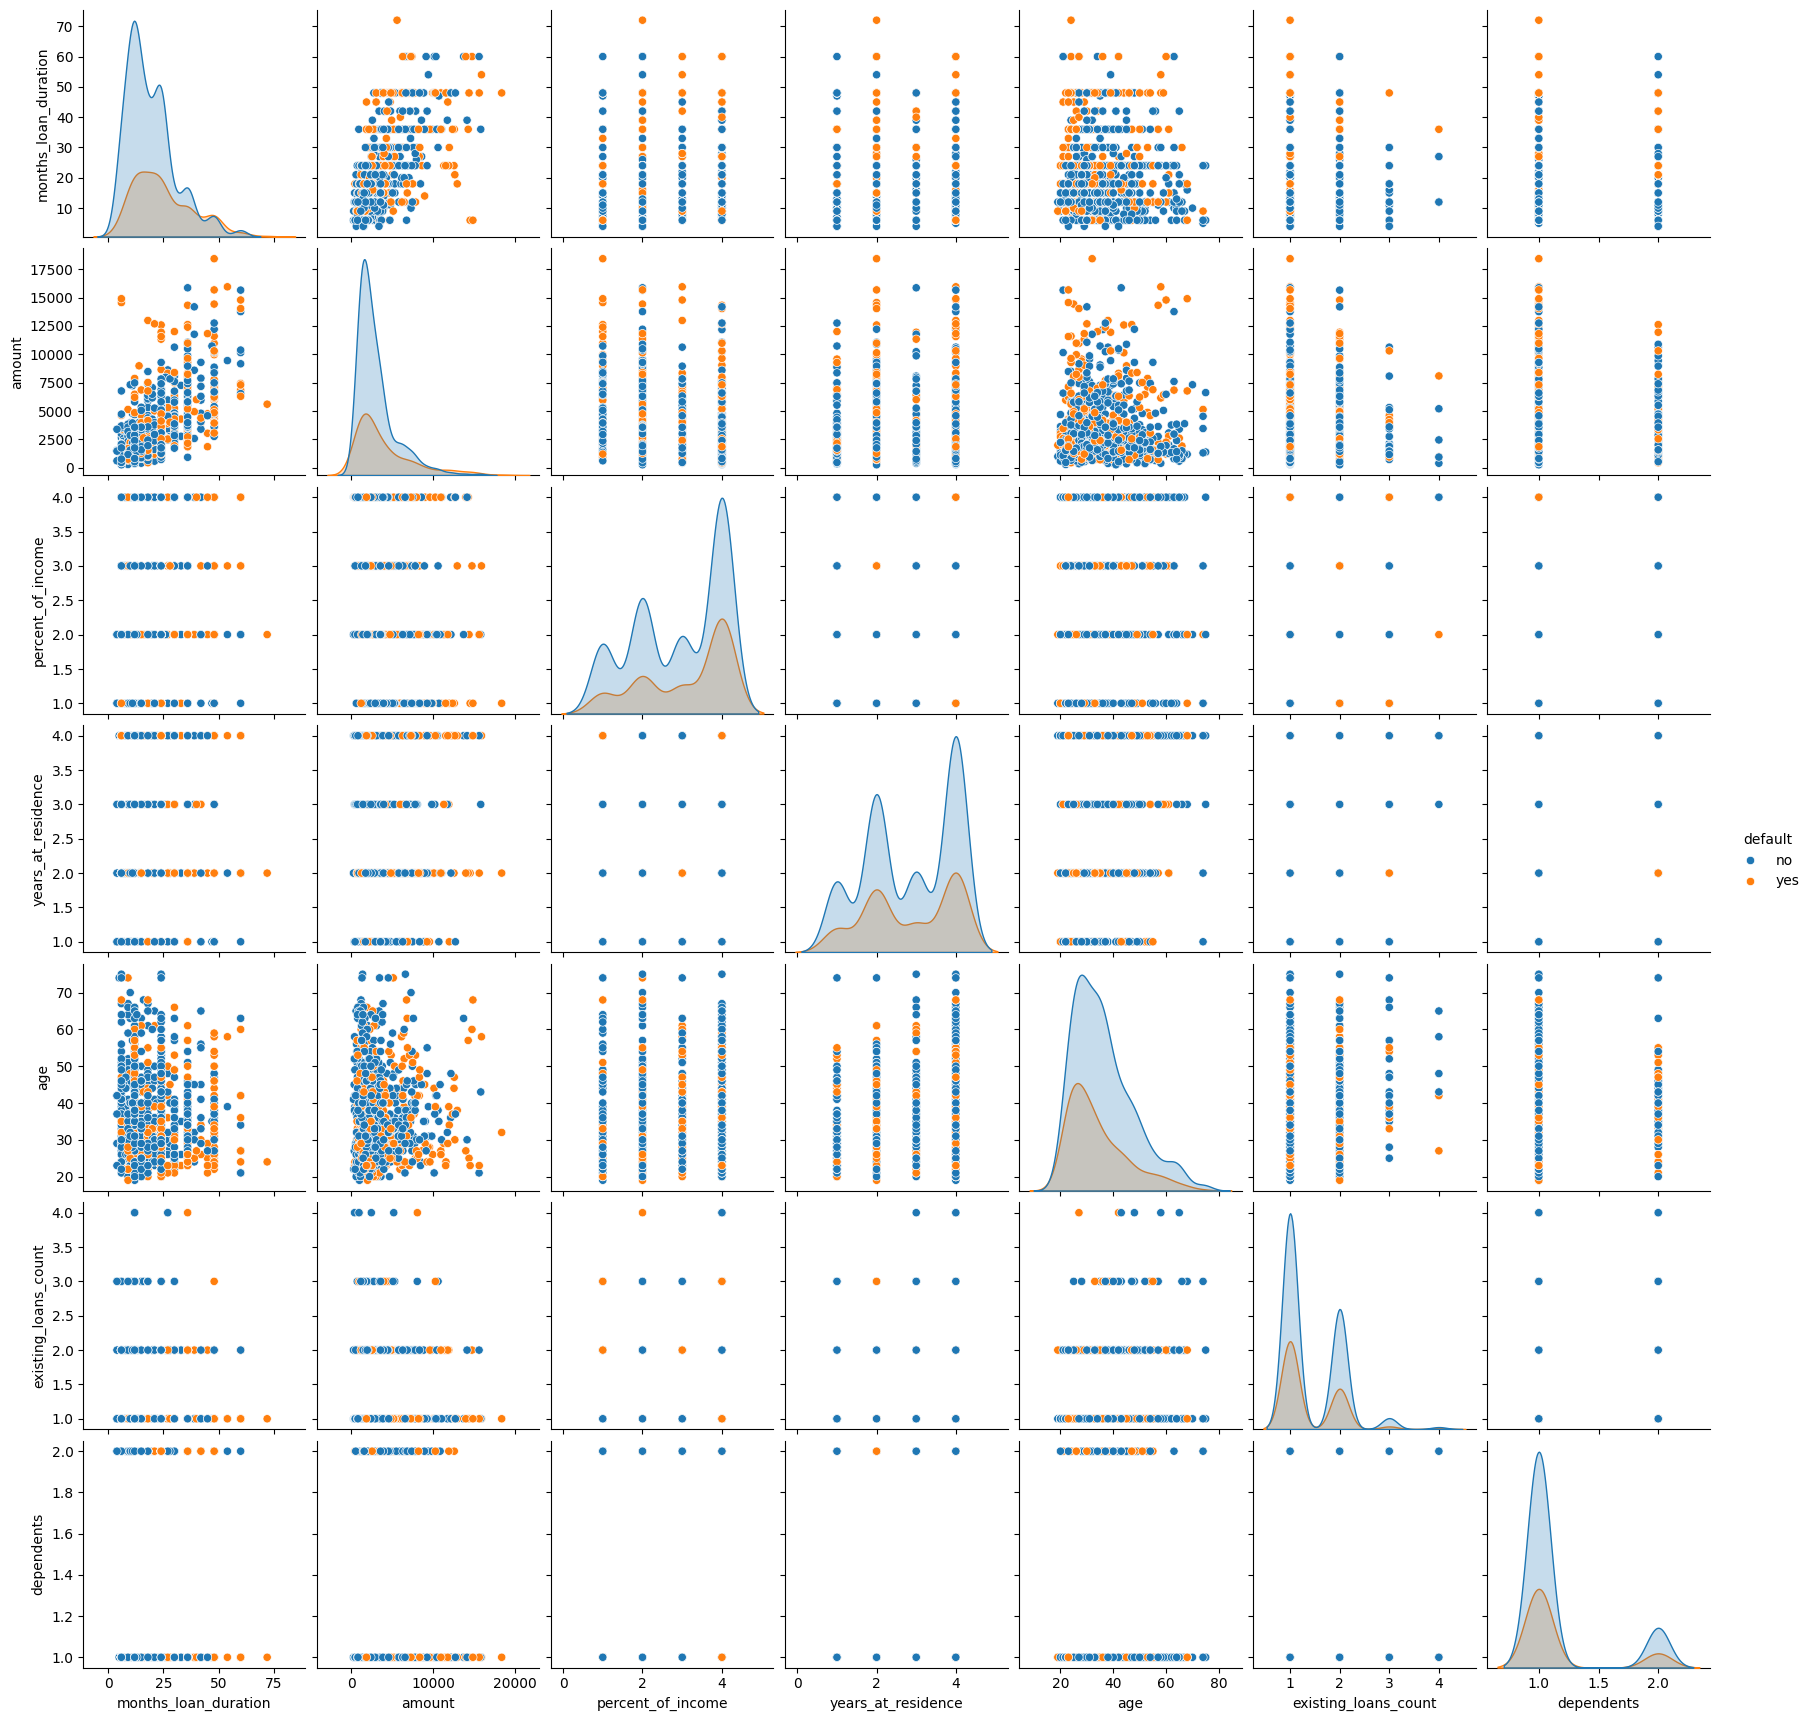

In [23]:
# Pairplot for numerical columns with default as the hue
sns.pairplot(data, hue='default')
plt.show()

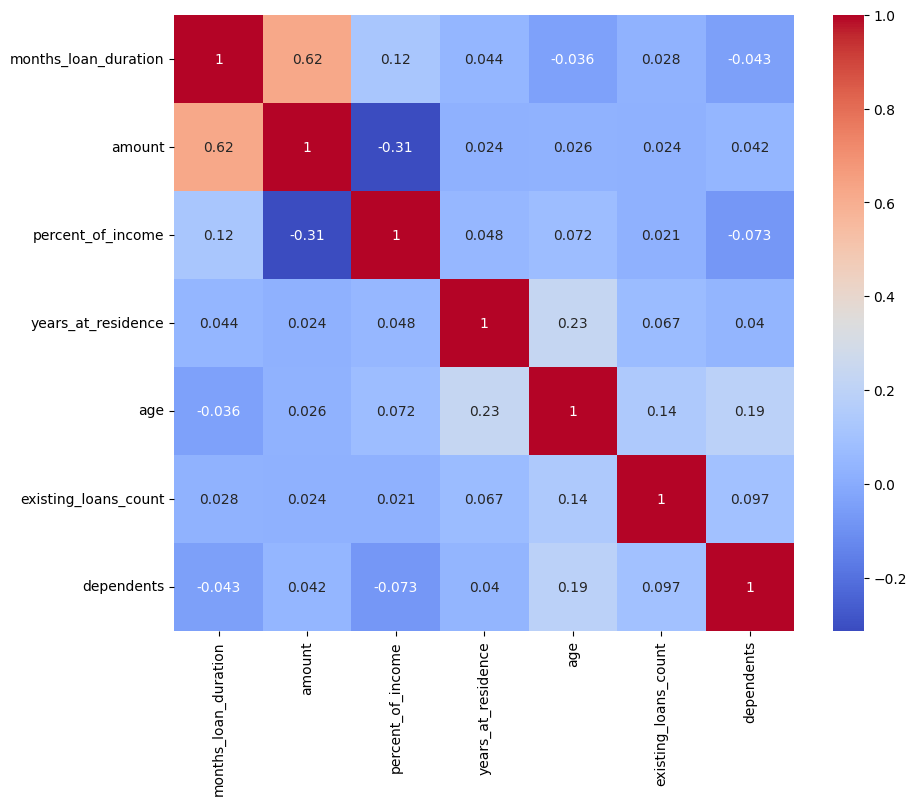

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624709,0.118046,0.043671,-0.036316,0.028430,-0.043265
amount,0.624709,1.000000,-0.313100,0.023646,0.026298,0.023778,0.041815
percent_of_income,0.118046,-0.313100,1.000000,0.047507,0.072157,0.020997,-0.072543
years_at_residence,0.043671,0.023646,0.047507,1.000000,0.234709,0.067193,0.040455
age,-0.036316,0.026298,0.072157,0.234709,1.000000,0.141287,0.190651
existing_loans_count,0.028430,0.023778,0.020997,0.067193,0.141287,1.000000,0.096978
dependents,-0.043265,0.041815,-0.072543,0.040455,0.190651,0.096978,1.000000


In [24]:
#correlation matrix
correlation_matrix = data[numeric_columns].corr(method='spearman')
plt.figure(figsize=(10,8))
#heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

correlation_matrix

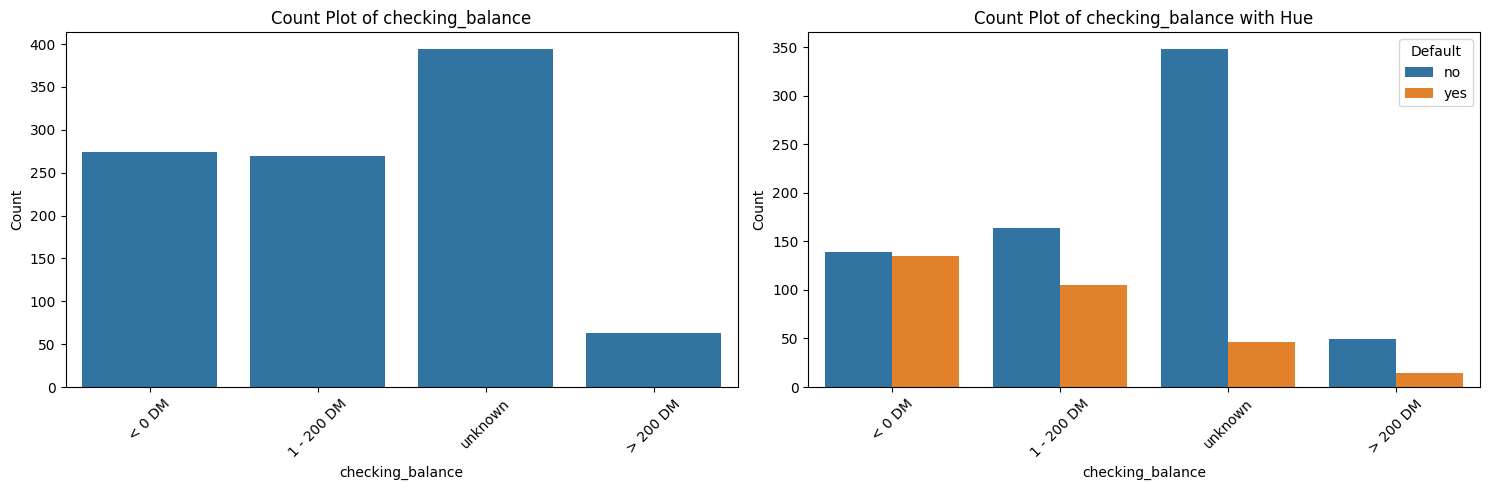

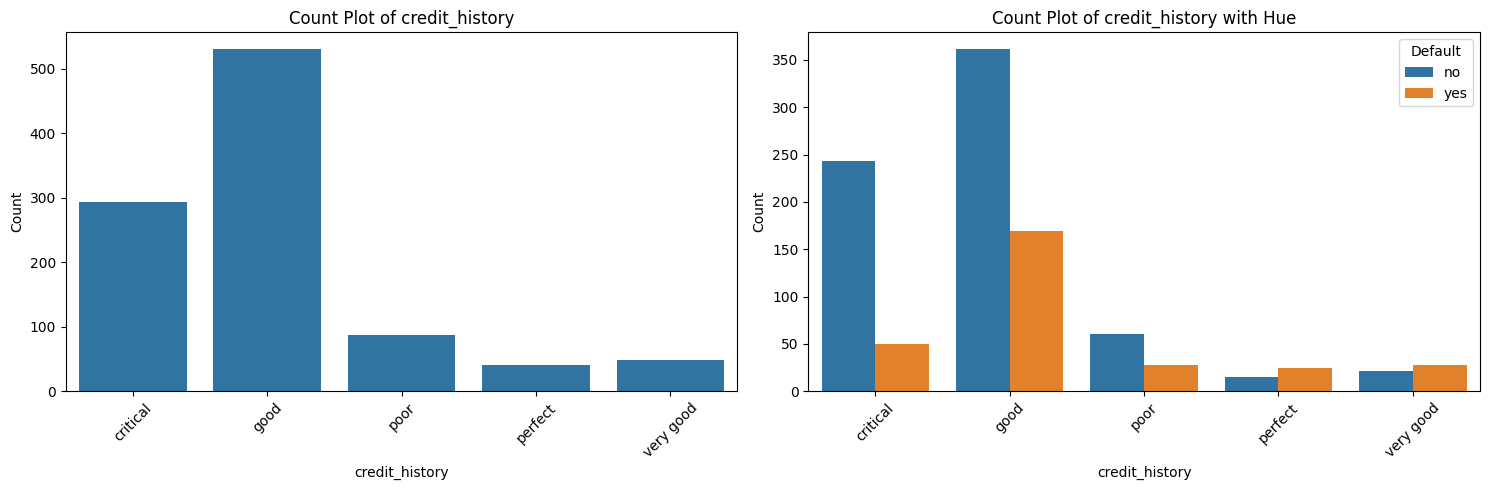

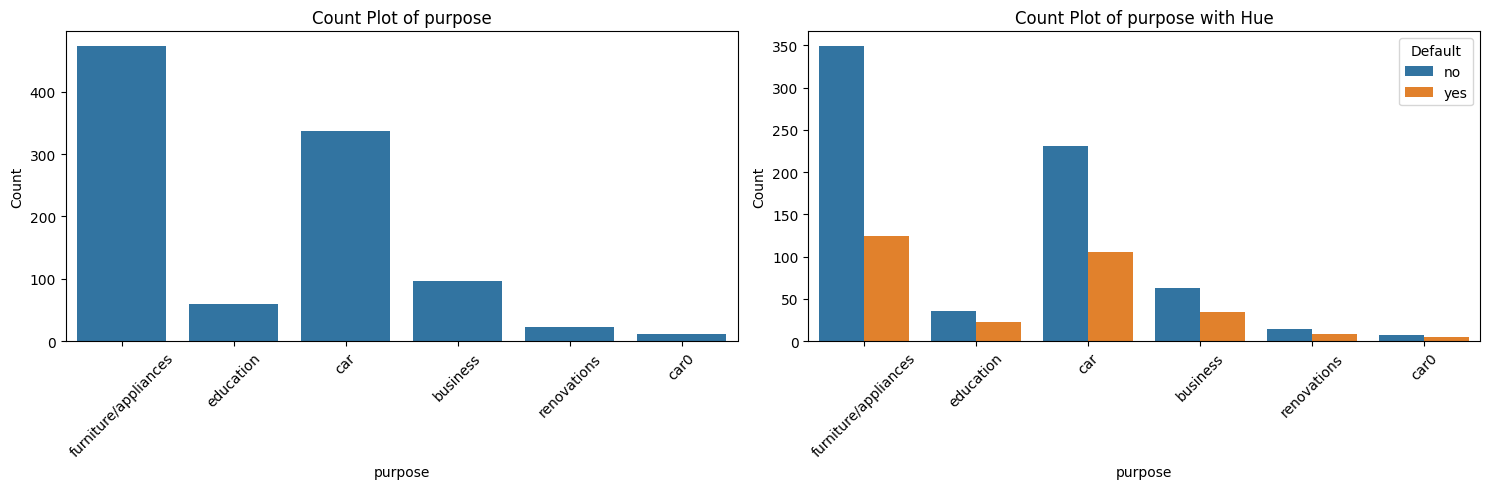

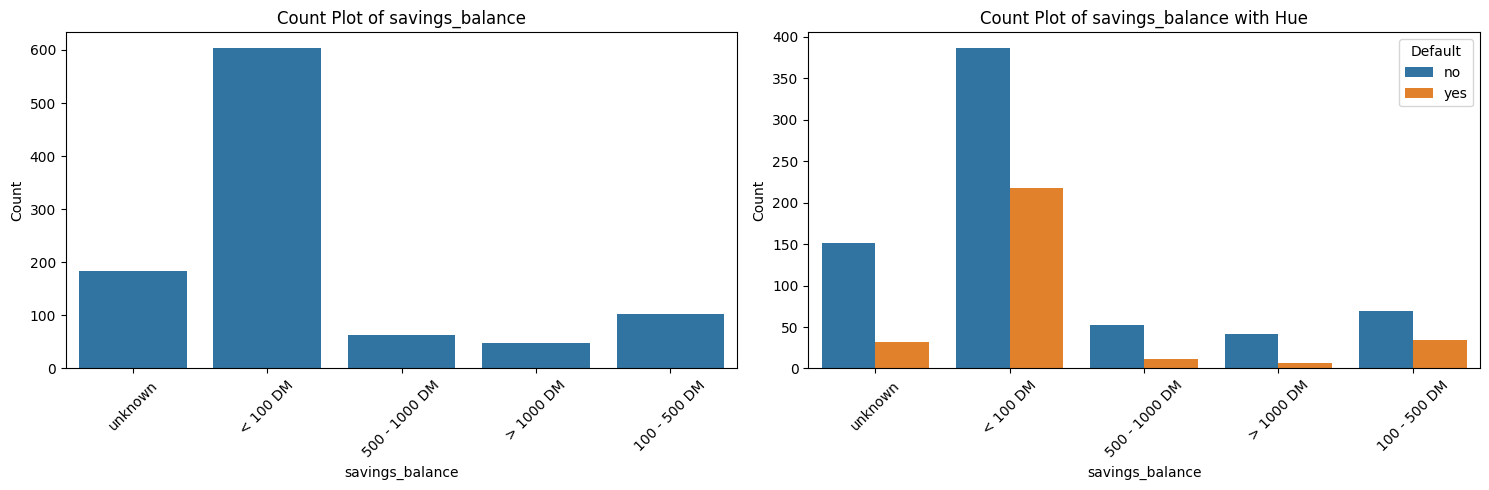

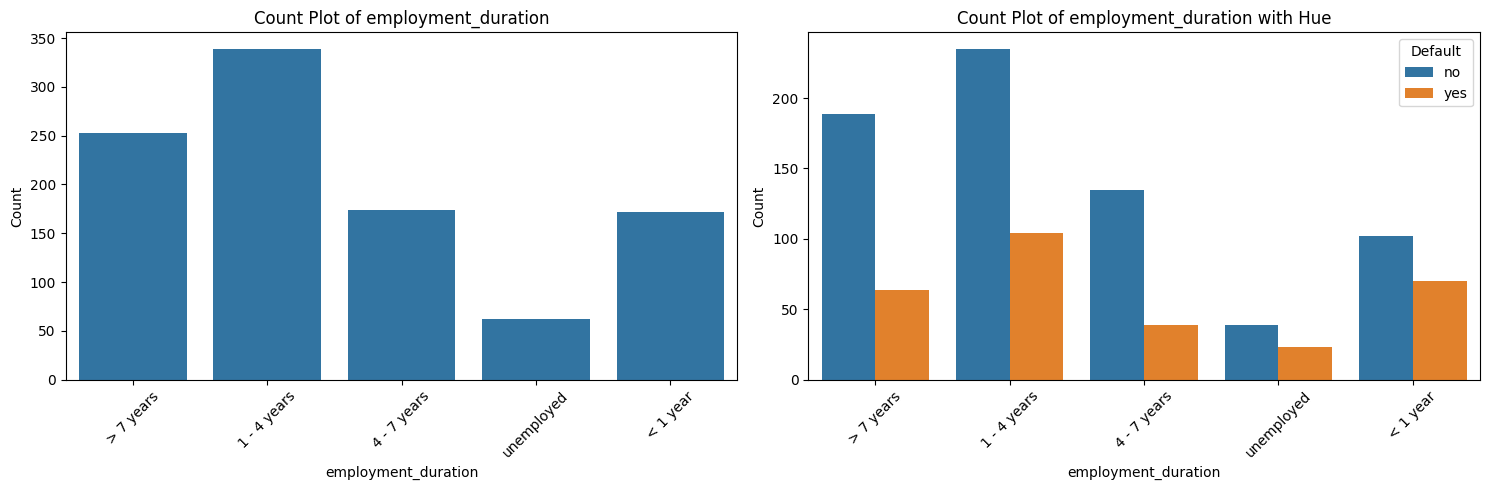

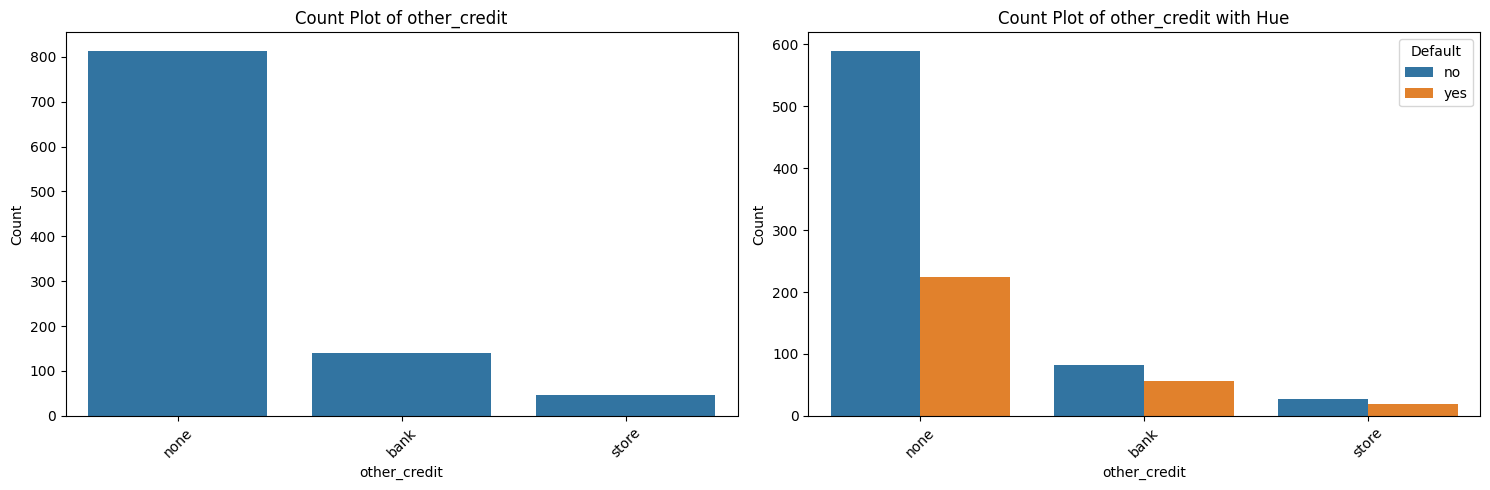

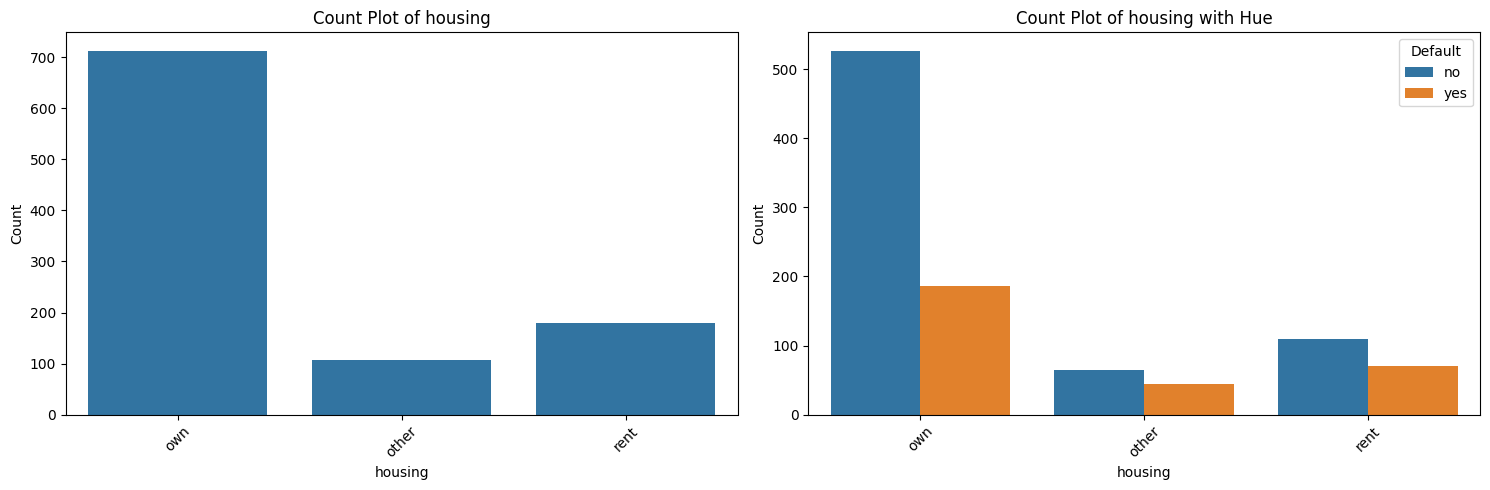

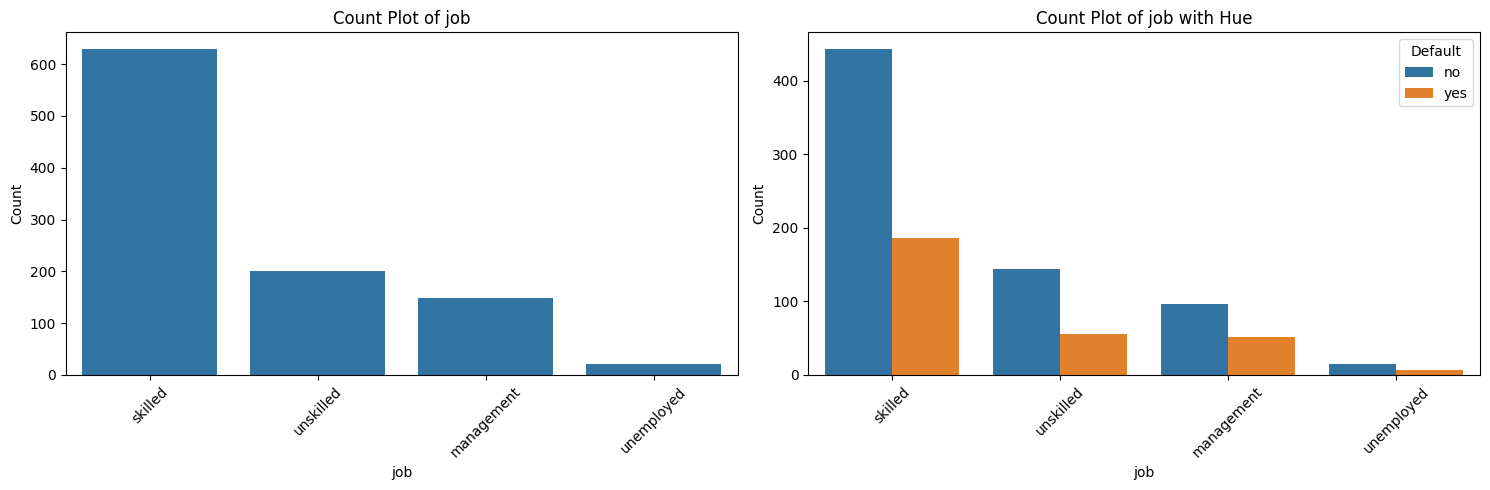

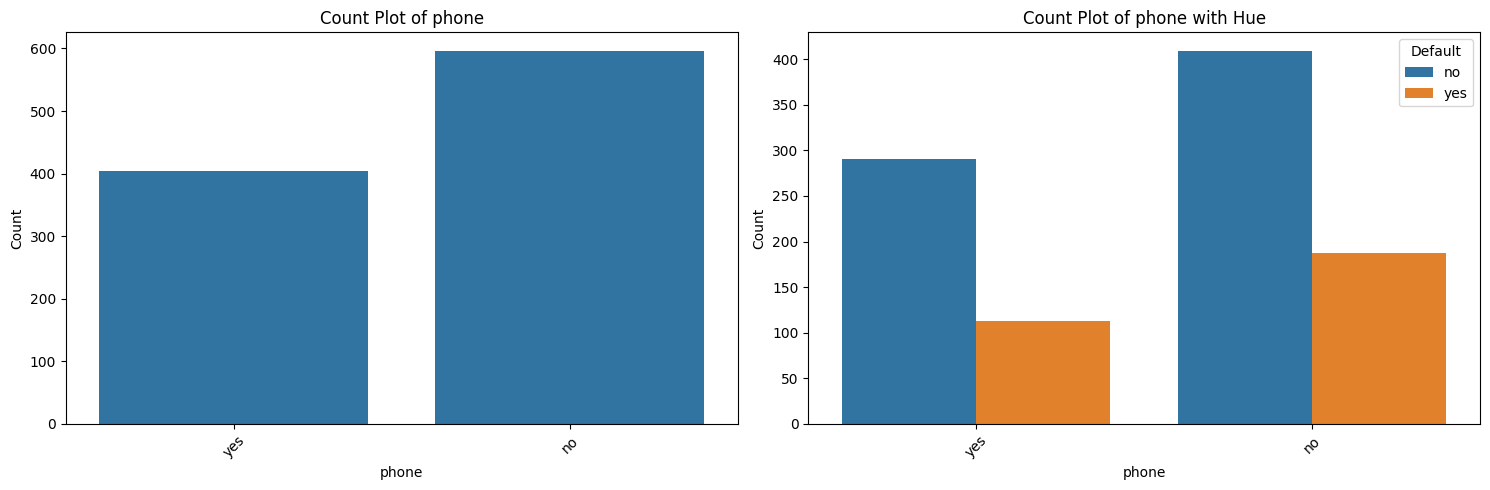

/tmp/ipython-input-3399347150.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Default', loc='upper right')


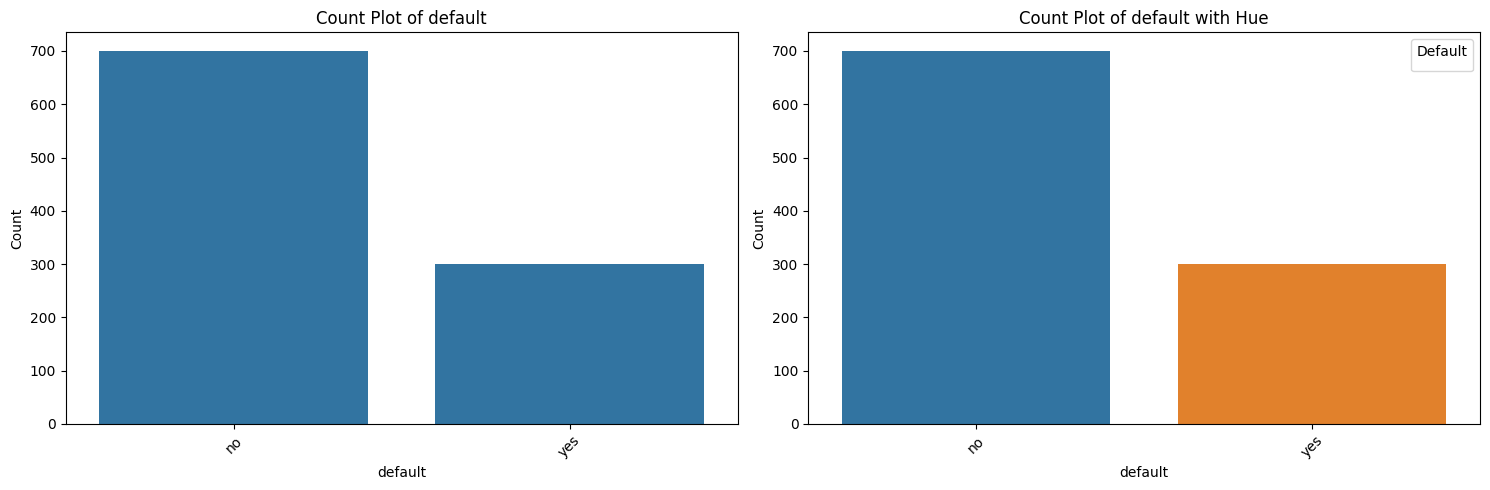

In [25]:
# Data Visualisation for categorical columns
for column in categorical_columns:
  plt.figure(figsize=(15,5))
  #count plot without hue
  plt.subplot(1,2,1)
  sns.countplot(data=data, x=column)
  plt.title(f'Count Plot of {column}')
  plt.xticks(rotation=45)
  plt.xlabel(column)
  plt.ylabel('Count')

  #count plot with hue
  plt.subplot(1,2,2)
  sns.countplot(data=data, x=column, hue='default')
  plt.title(f'Count Plot of {column} with Hue')
  plt.xticks(rotation=45)
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.legend(title='Default', loc='upper right')

  plt.tight_layout()
  plt.show()


# Encoding:

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Nominal columns for one-hot encoding
nominal_cols = ['checking_balance', 'purpose', 'savings_balance', 'other_credit', 'housing', 'job', 'phone']
nominal_data = data[nominal_cols]

# OneHotEncoding - Fit and transform on nominal data
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(nominal_data)

# encoded nominal features with appropriate names
df_nominal_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(nominal_cols))

df_nominal_encoded


,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
from sklearn.preprocessing import OrdinalEncoder

# ordinal columns with their ordered rankings
ordinal_cols = {
    'credit_history': ['critical', 'poor', 'good', 'very good', 'perfect'],
    'employment_duration': ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years']
}

# Dataframe for the ordinal columns
ordinal_data = data[['credit_history', 'employment_duration']].copy()

# OrdinalEncoding - Fit and transform on ordinal data
encoder = OrdinalEncoder(categories=list(ordinal_cols.values()))
encoded_data = encoder.fit_transform(ordinal_data)

# encoded ordinal features with appropriate names
df_ordinal_encoded = pd.DataFrame(encoded_data, columns=ordinal_cols.keys())

# adding a suffix to the original column names
df_ordinal_encoded.columns = [col + '_encoded' for col in df_ordinal_encoded.columns]

df_ordinal_encoded

,credit_history_encoded,employment_duration_encoded
0,0.0,4.0
1,2.0,2.0
2,0.0,3.0
3,2.0,3.0
4,1.0,2.0
...,...,...
995,2.0,3.0
996,2.0,2.0
997,2.0,4.0
998,2.0,2.0


In [28]:
# Final dataframe (Encoded categorical variables + available numerical columns)
final_df = pd.concat([df_nominal_encoded, df_ordinal_encoded, data], axis=1)

# drop the original nominal and ordinal columns
final_df.drop(nominal_cols + list(ordinal_cols.keys()), axis=1, inplace=True)

# in the default target column, map 'no' to 0 and 'yes' to 1
final_df['default'] = final_df['default'].map({'no': 0, 'yes': 1})

pd.set_option('display.max_columns', None)
print(final_df.columns)
print(final_df.info())
final_df

Index(['checking_balance_1 - 200 DM', 'checking_balance_< 0 DM',
       'checking_balance_> 200 DM', 'checking_balance_unknown',
       'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education',
       'purpose_furniture/appliances', 'purpose_renovations',
       'savings_balance_100 - 500 DM', 'savings_balance_500 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'other_credit_bank', 'other_credit_none',
       'other_credit_store', 'housing_other', 'housing_own', 'housing_rent',
       'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled',
       'phone_no', 'phone_yes', 'credit_history_encoded',
       'employment_duration_encoded', 'months_loan_duration', 'amount',
       'percent_of_income', 'years_at_residence', 'age',
       'existing_loans_count', 'dependents', 'default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 colu

,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes,credit_history_encoded,employment_duration_encoded,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,6,1169,4,4,67,2,1,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,48,5951,2,2,22,1,1,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,12,2096,2,3,49,1,2,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,42,7882,2,4,45,1,2,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,24,4870,3,4,53,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0,12,1736,3,4,31,1,1,0
996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,30,3857,4,4,40,1,1,0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,4.0,12,804,4,4,38,1,1,0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,45,1845,4,4,23,1,1,1


# Predictor-Response, Train-Test split and Standard Scaling (Standardization):

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Predictor and response variables
X = final_df.drop('default', axis=1)
y = final_df['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Logistic Regression

Training Data Performance:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       525
           1       0.66      0.48      0.55       225

    accuracy                           0.77       750
   macro avg       0.73      0.69      0.70       750
weighted avg       0.76      0.77      0.76       750

[[470  55]
 [118 107]]

Test Data Performance:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       175
           1       0.60      0.48      0.53        75

    accuracy                           0.75       250
   macro avg       0.70      0.67      0.68       250
weighted avg       0.74      0.75      0.74       250

[[151  24]
 [ 39  36]]


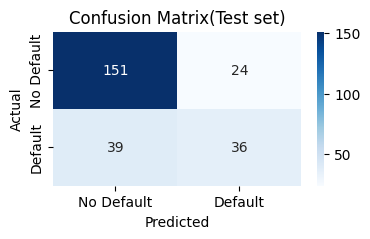

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# initialize logistic regression model
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train_scaled, y_train)

# predict on training data
y_pred_train = logreg.predict(X_train_scaled)

# Performance metrics on training data
print("Training Data Performance:")
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

# predict on test data
y_pred_test = logreg.predict(X_test_scaled)

# Performance metrics on test data
print("\nTest Data Performance:")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

# Confusion matrix for test data
plt.figure(figsize=(4,2))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(Test set)')
plt.show()





# Model 2: Quadratic Discriminant Analysis(QDA)

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Training Data Performance:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       525
           1       0.49      0.50      0.50       225

    accuracy                           0.69       750
   macro avg       0.64      0.64      0.64       750
weighted avg       0.70      0.69      0.69       750

[[407 118]
 [112 113]]

Test Data Performance:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       175
           1       0.41      0.41      0.41        75

    accuracy                           0.65       250
   macro avg       0.58      0.58      0.58       250
weighted avg       0.65      0.65      0.65       250

[[131  44]
 [ 44  31]]


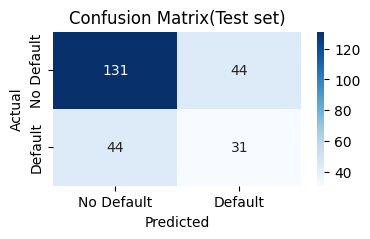

In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# initializing quadratic discriminant ananlysis and fitting the data into the model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

# predicting on the basis of training data
y_pred_train = qda.predict(X_train_scaled)

# Performance metrics(Training Data)
print("Training Data Performance:")
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

#predicting on the basis of test data
y_pred_test = qda.predict(X_test_scaled)

# Performance metrics(Test Data)
print("\nTest Data Performance:")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

# Confusion matrix for test data
plt.figure(figsize=(4,2))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(Test set)')
plt.show()

# Model 3: k-nearest neighbor algorithms(KNN)

Best value of 'k': 3
Training Data Performance:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       525
           1       0.77      0.62      0.69       225

    accuracy                           0.83       750
   macro avg       0.81      0.77      0.78       750
weighted avg       0.82      0.83      0.82       750

[[482  43]
 [ 85 140]]

Test Data Performance:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       175
           1       0.51      0.43      0.46        75

    accuracy                           0.70       250
   macro avg       0.64      0.62      0.63       250
weighted avg       0.69      0.70      0.70       250

[[144  31]
 [ 43  32]]


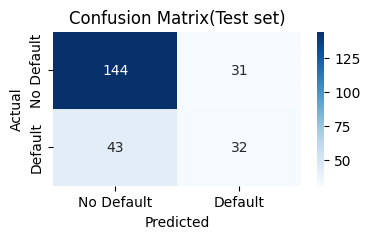

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize KNN model
knn = KNeighborsClassifier()

# hyperparameter tuning with GridSearchCV to find the best value of 'k' which gives highest recall performance
param_grid = {'n_neighbors': [1,2,3,5,7]}

# fit the grid search on the training data
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# best hyperparameter for grid search
best_k = grid_search.best_params_['n_neighbors']

#print best value of 'k'
print("Best value of 'k':", best_k)

# initialize k-nearest neighbor with the best hyperparameter 'k' value
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# fit the model
knn_best.fit(X_train_scaled, y_train)

# predicting based on training data
y_pred_train = knn_best.predict(X_train_scaled)

# Performance metrics
print("Training Data Performance:")
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

# predicting based on test data
y_pred_test = knn_best.predict(X_test_scaled)

# Performance metrics
print("\nTest Data Performance:")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

# Confusion matrix on test data
plt.figure(figsize=(4,2))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(Test set)')
plt.show()

standardscale
confusion matrix

# Model 4: Support Vector Machine

Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):
C: 10
Kernel: rbf
Gamma: scale

Training Data Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       525
           1       0.99      0.92      0.95       225

    accuracy                           0.97       750
   macro avg       0.98      0.95      0.96       750
weighted avg       0.97      0.97      0.97       750

[[522   3]
 [ 19 206]]

Test Data Performance:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       175
           1       0.56      0.44      0.49        75

    accuracy                           0.73       250
   macro avg       0.67      0.65      0.65       250
weighted avg       0.71      0.73      0.72       250

[[149  26]
 [ 42  33]]


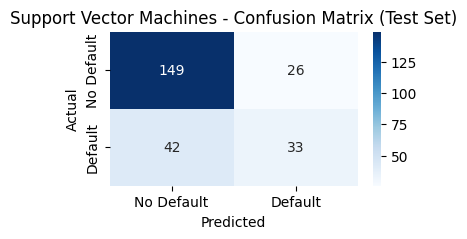

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# initialize support vector machine
svm = SVC(random_state=42)

# finding best hyperparameters by choosing the one which outputs the highest recall performance
param_grid= {
    'C': [5, 10, 15, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Fit the grid search on the training data for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameter values for grid search
best_params = grid_search.best_params_
best_C = best_params['C']
best_kernel = best_params['kernel']
best_gamma = best_params['gamma']
print("Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):")
print("C:", best_C)
print("Kernel:", best_kernel)
print("Gamma:", best_gamma)

# initialize support vector machine model with the best
svm_best = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, random_state=42)

# Fit the model on the training data
svm_best.fit(X_train_scaled, y_train)

# predicting based on training data
y_pred_train = svm_best.predict(X_train_scaled)

# Performance metrics
print("\nTraining Data Performance:")
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

# Make predictions on test data
y_pred_test = svm_best.predict(X_test_scaled)

# Performance metrics
print("\nTest Data Performance:")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

# Confusion matrix for test data
plt.figure(figsize=(4,2))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Support Vector Machines - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 5: Random  Decision Forest

Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):
n_estimators: 400
max_depth: None
min_samples_split: 2

Training Data Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

[[525   0]
 [  0 225]]

Test Data Performance:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       175
           1       0.65      0.47      0.54        75

    accuracy                           0.76       250
   macro avg       0.72      0.68      0.69       250
weighted avg       0.75      0.76      0.75       250

[[156  19]
 [ 40  35]]


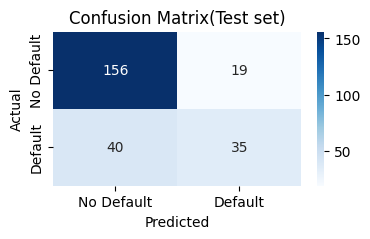

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# initialize random forest model
rf = RandomForestClassifier(random_state=42)

# hyperparameter tuning with GridSearchCV to find the best value of 'n_estimators' which gives highest recall performance
param_grid = {
    'n_estimators': [350, 400, 450],
    'max_depth': [None, 20],
    'min_samples_split': [2, 3, 4]
}

# fit the grid search on the training data
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# best hyperparameter for grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
print("Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)
print("min_samples_split:", best_min_samples_split)

# initialize random forest with best hyperparameters
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)

# fit the model on the training data
rf_best.fit(X_train_scaled, y_train)

# predicting based on training data
y_pred_train = rf_best.predict(X_train_scaled)

# Performance metrics
print("\nTraining Data Performance:")
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

# predicting based on test data
y_pred_test = rf_best.predict(X_test_scaled)

# Performance metrics
print("\nTest Data Performance:")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

# Confusion matrix on test data
plt.figure(figsize=(4,2))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(Test set)')
plt.show()


# Model 6: Gradient Boosting

Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):
n_estimators: 150
learning_rate: 0.3
max_depth: 3

Training Data Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

[[525   0]
 [  1 224]]

Test Data Performance:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       175
           1       0.59      0.48      0.53        75

    accuracy                           0.74       250
   macro avg       0.69      0.67      0.68       250
weighted avg       0.73      0.74      0.74       250

[[150  25]
 [ 39  36]]


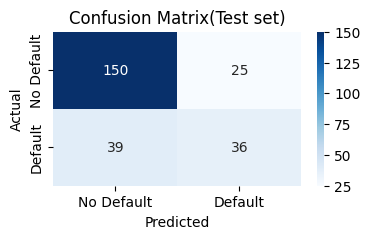

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# initialize gradient boosting
gb = GradientBoostingClassifier(random_state=42)

# hyperparameter tuning with GridSearchCV to find the best value of 'n_estimators' which gives highest recall performance
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4],
}

# fit the grid search on the training data
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# best hyperparameter for grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
print("Best hyperparameters (having highest 'recall' performance value during cross-validation on Training data):")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)
print("max_depth:", best_max_depth)

# initialize gradient boosting with best hyperparameters
gradient_boosting_best = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                                    max_depth=best_max_depth,
                                                    random_state=42)

# fit the model on the training data
gradient_boosting_best.fit(X_train_scaled, y_train)

# predictions on training data
y_pred_train = gradient_boosting_best.predict(X_train_scaled)

# Performance metrics
print("\nTraining Data Performance:")
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

# predictions on test data
y_pred_test = gradient_boosting_best.predict(X_test_scaled)

# Performance metrics
print("\nTest Data Performance:")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

# Confusion matrix on test data
plt.figure(figsize=(4,2))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Gradient Boosting - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(Test set)')
plt.show()



# Model 7: AdaBoost

Best hyperparameters:
n_estimators: 200
learning_rate: 0.8
AdaBoost (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       525
           1       0.69      0.47      0.56       225

    accuracy                           0.78       750
   macro avg       0.74      0.69      0.70       750
weighted avg       0.77      0.78      0.76       750

AdaBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[477  48]
 [120 105]]



AdaBoost (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       175
           1       0.65      0.44      0.52        75

    accuracy                           0.76       250
   macro avg       0.72      0.67      0.68       250
weighted avg       0.75      0.76      0.74       250



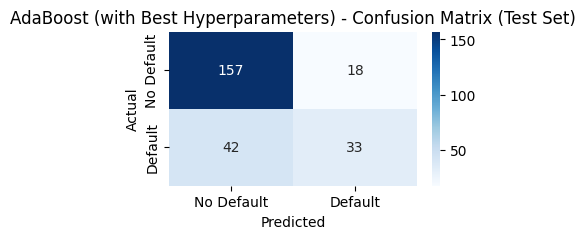

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.5, 0.6, 0.7, 0.8],
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)

# Initialize AdaBoost model with best hyperparameters
adaboost_best = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                                   random_state=42)

# Fit the model on the training data
adaboost_best.fit(X_train_scaled, y_train)

# Predictions on training data
y_pred_train_adaboost = adaboost_best.predict(X_train_scaled)

# Performance metrics on training data
print("AdaBoost (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_adaboost))
conf_matrix_train_adaboost = confusion_matrix(y_train, y_pred_train_adaboost)
print("AdaBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_adaboost)



# Predictions on test data
y_pred_test_adaboost = adaboost_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nAdaBoost (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_adaboost))
conf_matrix_test_adaboost = confusion_matrix(y_test, y_pred_test_adaboost)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_adaboost, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('AdaBoost (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Model 8: XGBoost

Best hyperparameters:
n_estimators: 250
learning_rate: 0.5
max_depth: 4
XGBoost (with Best Hyperparameters) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

XGBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):
[[525   0]
 [  0 225]]



XGBoost (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       175
           1       0.54      0.45      0.49        75

    accuracy                           0.72       250
   macro avg       0.66      0.64      0.65       250
weighted avg       0.71      0.72      0.71       250



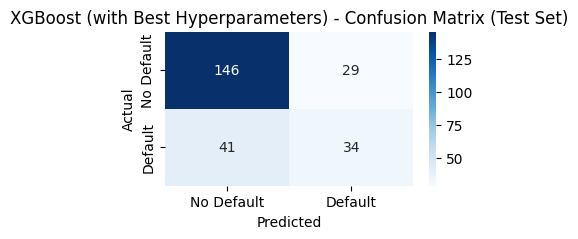

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42)

# Hyperparameters tuning using GridSearchCV with 'recall' scoring
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.3, 0.4, 0.5, 0.6],
    'max_depth': [3, 4, 5, 6]
}

# Fit the grid search on the training data
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
print("Best hyperparameters:")
print("n_estimators:", best_n_estimators)
print("learning_rate:", best_learning_rate)
print("max_depth:", best_max_depth)

# Initialize XGBoost model with best hyperparameters
xgb_best = XGBClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate,
                         max_depth=best_max_depth,
                         random_state=42)

# Fit the model on the training data
xgb_best.fit(X_train_scaled, y_train)

# Predictions on training data
y_pred_train_xgb = xgb_best.predict(X_train_scaled)

# Performance metrics on training data
print("XGBoost (with Best Hyperparameters) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_xgb))
conf_matrix_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
print("XGBoost (with Best Hyperparameters) - Confusion Matrix (Training Set):")
print(conf_matrix_train_xgb)

# Predictions on test data
y_pred_test_xgb = xgb_best.predict(X_test_scaled)

# Performance metrics on test data
print("\n\n\nXGBoost (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_xgb))
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('XGBoost (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# AUC-PR For Model Selection(PR Curve for best performing model):

In [40]:
# statistics for qualitative categorical columns
data.describe(include=['O']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('unique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

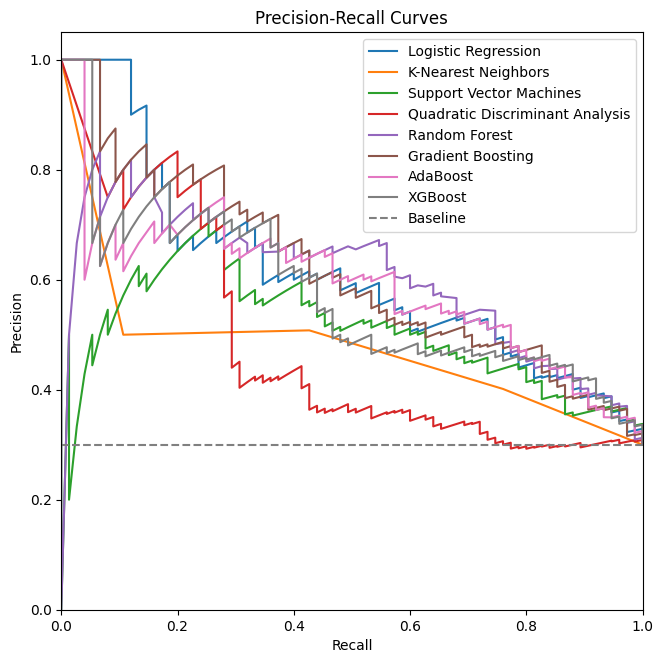

AUC-PR Values (Area Under the Curve in a Precision-Recall plot):
                          Model   AUC-PR
              Gradient Boosting 0.615323
            Logistic Regression 0.612937
                  Random Forest 0.596482
                       AdaBoost 0.588526
                        XGBoost 0.572278
        Support Vector Machines 0.498942
            K-Nearest Neighbors 0.476996
Quadratic Discriminant Analysis 0.475198


In [41]:
from sklearn.metrics import precision_recall_curve, auc

# List of all the model names
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machines',
               'Quadratic Discriminant Analysis', 'Random Forest', 'Gradient Boosting',
               'AdaBoost', 'XGBoost']

# List of corresponding fitted models
fitted_models = [logreg, knn_best, svm_best, qda, rf_best, gradient_boosting_best,
                 adaboost_best, xgb_best]

# Dictionary to store precision-recall curve data and AUC-PR values
prc_data = {}
auc_pr_values = []

# Calculate precision-recall curve and AUC-PR for each model
for model_name, model in zip(model_names, fitted_models):
    # Calculate predicted probabilities for positive class
    if hasattr(model, "predict_proba"):
        predicted_probabilities = model.predict_proba(X_test_scaled)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test_scaled)

    # Calculate precision-recall curve (i.e., precision and recall values at different threshold points)
    precision, recall, _ = precision_recall_curve(y_test, predicted_probabilities)

    # Calculate AUC-PR (i.e., area under the curve for each model)
    auc_pr = auc(recall, precision)
    auc_pr_values.append(auc_pr)

    # Store data in the dictionary
    prc_data[model_name] = {'precision': precision, 'recall': recall}



# Plot Precision-Recall curves for all models
plt.figure(figsize=(7.5, 7.5))
for model_name in model_names:
    plt.plot(prc_data[model_name]['recall'], prc_data[model_name]['precision'], label=model_name)

# Calculate the ratio of positive and negative samples in the test set
ratio_positives = len(y_test[y_test == 1]) / len(y_test)
ratio_negatives = 1 - ratio_positives

# Plot baseline curve (always predicting majority class)
plt.plot([0, 1], [ratio_positives, ratio_positives], linestyle='--', label='Baseline', color='gray')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# DataFrame for AUC-PR values
auc_pr_df = pd.DataFrame({'Model': model_names, 'AUC-PR': auc_pr_values})

# Sort DataFrame by AUC-PR in descending order
auc_pr_df = auc_pr_df.sort_values(by='AUC-PR', ascending=False)

# Display AUC-PR values
print("AUC-PR Values (Area Under the Curve in a Precision-Recall plot):")
print(auc_pr_df.to_string(index=False))


#Final model with higher 'recall' performance
AUC-PR Values, i.e., Area Under the Curve in a Precision-Recall plot for an imbalanced classification problem:

                      Model   AUC-PR
          Gradient Boosting 0.619926
        Logistic Regression 0.607566
              Random Forest 0.587175
                    XGBoost 0.584157

Based on the above AUC-PR values among the top 4 performing models, we see that "Gradient Boosting" has the highest value. We can now try to optimize the 'recall' value for "Gradient Boosting Model" to achieve our goal i.e., minimizing the false negatives.

A higher AUC-PR value for the "Gradient Boosting" model indicates that it has better overall performance in terms of the trade-off between precision and recall compared to the other models. A higher AUC-PR value generally indicates that the model is able to maintain high precision while achieving high recall as well, which is especially important for imbalanced datasets.

# Optimizing "Recall" for Gradient Boosting Model:

Optimal Threshold that maximizes F1-score (i.e., optimizing both Precision and Recall): 0.13610903134937088
Optimal Precision: 0.4806201550387597
Optimal Recall: 0.8266666666666667


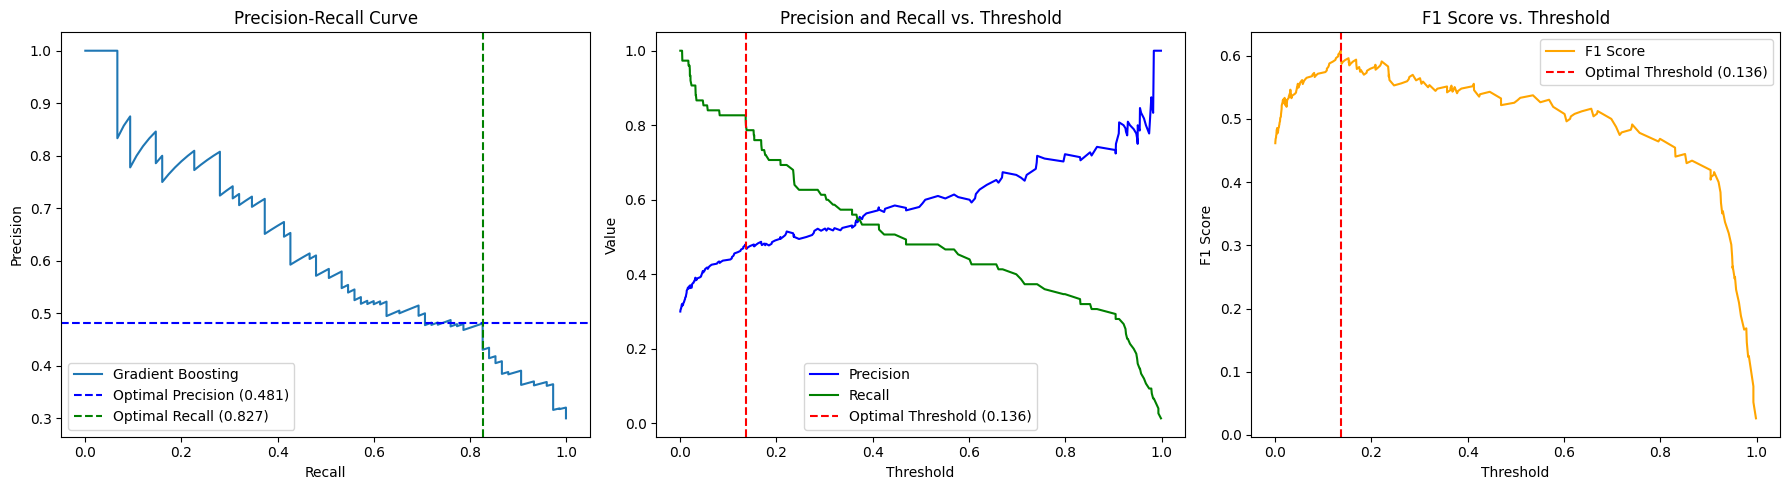

In [42]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

# Calculate predicted probabilities for positive class
predicted_probabilities = gradient_boosting_best.predict_proba(X_test_scaled)[:, 1]

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted_probabilities)

# F1-score for different probability thresholds
f1_scores = 2 * (precision * recall) / (precision + recall)

# Threshold value that maximizes F1-score (i.e., optimizing both Precision and Recall)
optimal_threshold_index = np.argmax(f1_scores)

# Optimal threshold value
optimal_threshold = thresholds[optimal_threshold_index]
optimal_precision = precision[optimal_threshold_index]
optimal_recall = recall[optimal_threshold_index]
print("Optimal Threshold that maximizes F1-score (i.e., optimizing both Precision and Recall):", optimal_threshold)
print("Optimal Precision:", optimal_precision)
print("Optimal Recall:", optimal_recall)



# Plot Precision-Recall curve for different thresholds
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(recall, precision, label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.axhline(y=optimal_precision, color='blue', linestyle='--', label=f'Optimal Precision ({optimal_precision:.3f})')
plt.axvline(x=optimal_recall, color='green', linestyle='--', label=f'Optimal Recall ({optimal_recall:.3f})')
plt.legend()

# Plot Precision and Recall VS threshold
plt.subplot(1, 3, 2)
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.legend()

# Plot F1-score VS threshold
plt.subplot(1, 3, 3)
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='orange')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.legend()

plt.tight_layout()
plt.show()

Custom probability decision threshold: 0.14

Gradient Boosting (with custom Threshold) - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       525
           1       0.85      1.00      0.92       225

    accuracy                           0.95       750
   macro avg       0.92      0.96      0.94       750
weighted avg       0.95      0.95      0.95       750

Gradient Boosting (with custom Threshold) - Confusion Matrix (Training Set):
[[485  40]
 [  0 225]]



Gradient Boosting (with custom Threshold) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.87      0.62      0.73       175
           1       0.47      0.79      0.59        75

    accuracy                           0.67       250
   macro avg       0.67      0.70      0.66       250
weighted avg       0.75      0.67      0.69       250



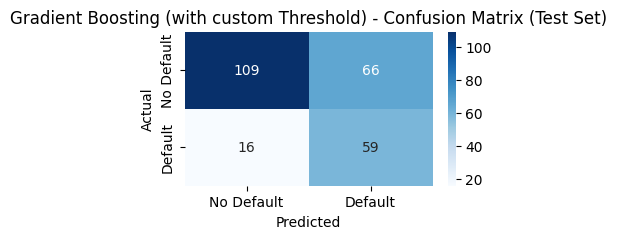

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# We can input 'optimal_threshold' to maintain a balance between precision-recall trade-off.
# We can also lower the threshold value further than 'optimal_threshold' to reduce False Negatives.
custom_threshold = 0.14
print("Custom probability decision threshold:", custom_threshold)

# Calculate predicted probabilities for positive class (train and test)
predicted_probabilities_train_gb = gradient_boosting_best.predict_proba(X_train_scaled)[:, 1]
predicted_probabilities_test_gb = gradient_boosting_best.predict_proba(X_test_scaled)[:, 1]

# Make predictions using the custom threshold for both train and test
y_pred_train_gb_custom = (predicted_probabilities_train_gb >= custom_threshold).astype(int)
y_pred_test_gb_custom = (predicted_probabilities_test_gb >= custom_threshold).astype(int)

# Performance metrics on training data using custom threshold
print("\nGradient Boosting (with custom Threshold) - Training Set Performance:")
print(classification_report(y_train, y_pred_train_gb_custom))
conf_matrix_train_gb_custom = confusion_matrix(y_train, y_pred_train_gb_custom)
print("Gradient Boosting (with custom Threshold) - Confusion Matrix (Training Set):")
print(conf_matrix_train_gb_custom)

# Performance metrics on test data using custom threshold
print("\n\n\nGradient Boosting (with custom Threshold) - Test Set Performance:")
print(classification_report(y_test, y_pred_test_gb_custom))
conf_matrix_test_gb_custom = confusion_matrix(y_test, y_pred_test_gb_custom)

# Confusion matrix for test data using custom threshold
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_gb_custom, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Gradient Boosting (with custom Threshold) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

"Gradient Boosting Model" was found to be the best performing model among others according to AUC-PR curve.